# **Sales Price Study Notebook**

## Objectives

* Answer business requirement 1
  * The client is interested in discovering how the house attributes correlate with the sale price.
  * Therefore, the client expects data visualizations of the correlated variables against the sale price.

<br>

* Load and inspect the data prepared during data collection
* Data exploration
* Correlation study
* EDA on selected variables
* Conclusions and next steps

## Inputs

* inputs/datasets/raw/house-price-20211124T154130Z-001/house-price/house_prices_records.csv

## Additional Comments

* This notebook was written based on the guidelines provided in the Customer Churn walk through project, data cleaning lesson.
* In this note book we explore the data using the CRISP-DM Data Understanding methodology

---

# Change working directory

Change the working directory from its current folder to its parent folder
* Access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/housing-sales-price-prediction-dashboard/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/housing-sales-price-prediction-dashboard'

---

# Import Packages

In [4]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from pandas_profiling import ProfileReport

---

# Load the House Price Records prepared during data collection

Read the house_prices_records dataset csv file into a Pandas dataframe

In [5]:
df = pd.read_csv(f"inputs/datasets/raw/house-price-20211124T154130Z-001/house-price/house_prices_records.csv")
print(df.shape)
df.head()

(1460, 24)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,GarageYrBlt,GrLivArea,KitchenQual,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,2003.0,1710,Gd,8450,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,1976.0,1262,TA,9600,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,2001.0,1786,Gd,11250,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,1998.0,1717,Gd,9550,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,2000.0,2198,Gd,14260,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


---

# Data Exploration

Explore the dataset, by checking variable types and distribution, missing levels and what value these variables may add in the context of the first business requirement.  

In [6]:
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---

# Correlation Study

Assess correlation levels across **numerical** variables using  `spearman` and `pearson` methods.

* We will exclude the first item returned as this will be the correlation between SalePrice and SalePrice
* We will only fetch the 10 most relevant correlations

---

Using the '`pearson`' method to measure the linear relationship between two features

In [7]:
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

---

Using the '`spearman`' method to measure the linear relationship between two features

In [8]:
corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual     0.809829
GrLivArea       0.731310
YearBuilt       0.652682
GarageArea      0.649379
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
OpenPorchSF     0.477561
LotArea         0.456461
Name: SalePrice, dtype: float64

#### Observation
* For both methods, we notice positively strong levels of correlation between Sales Price and at least 5 variables respectively. 

---

* Now we take the top 5 variables returned for each method, transform them to a list and concatenate the two lists
* The result will be the top (unique) correlated variables from both methods

In [9]:
top_n = 5
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

* The result is 6 variables that correlate to Sale Price
* These variables will be tested on strength to predicting Sale Price 

In [10]:
corr_var_list = list(set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list()))
corr_var_list

['YearBuilt',
 'GarageArea',
 'OverallQual',
 '1stFlrSF',
 'TotalBsmtSF',
 'GrLivArea']

---

# EDA on the Correlated Variable List

---

* Filter the house price dataset on only the correlated variable list and include the sale price

In [11]:
df_eda = df.filter(corr_var_list + ['SalePrice'])
print(df_eda.shape)
df_eda.head(5)

(1460, 7)


,YearBuilt,GarageArea,OverallQual,1stFlrSF,TotalBsmtSF,GrLivArea,SalePrice
0,2003,548,7,856,856,1710,208500
1,1976,460,6,1262,1262,1262,181500
2,2001,608,7,920,920,1786,223500
3,1915,642,7,961,756,1717,140000
4,2000,836,8,1145,1145,2198,250000


## Visualize variable correlation to Sale Price

Plot the distribution

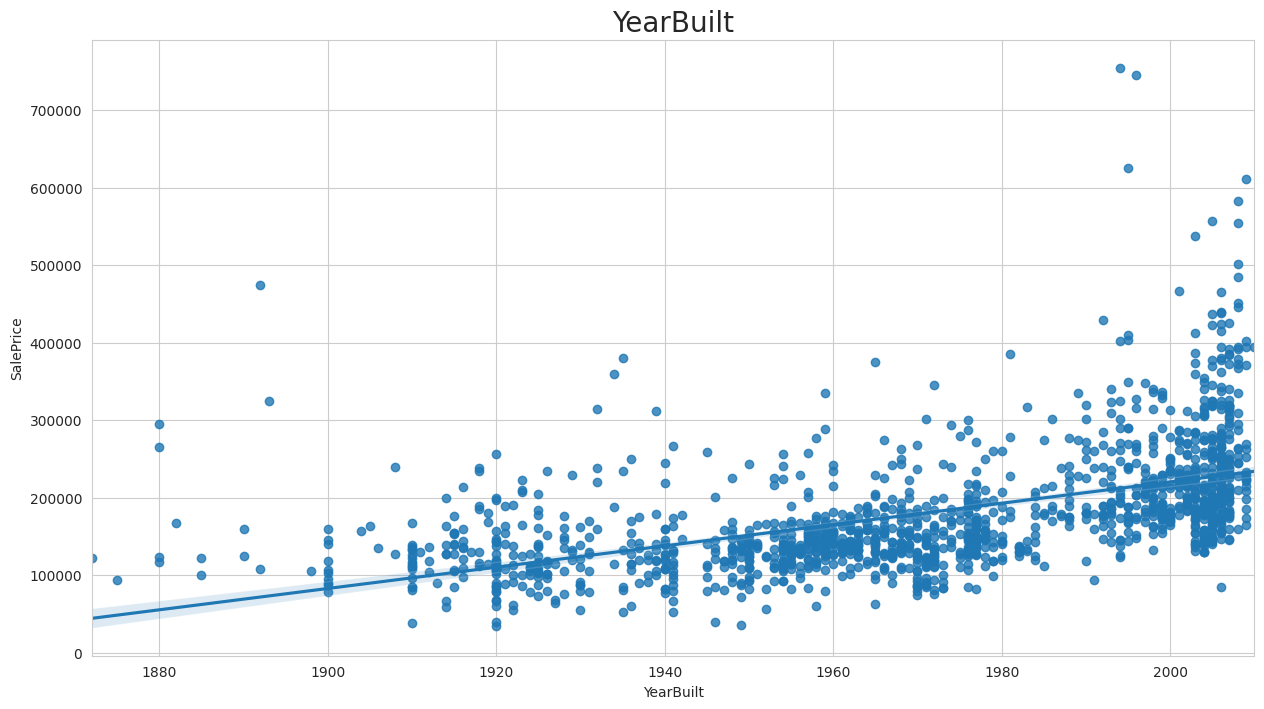

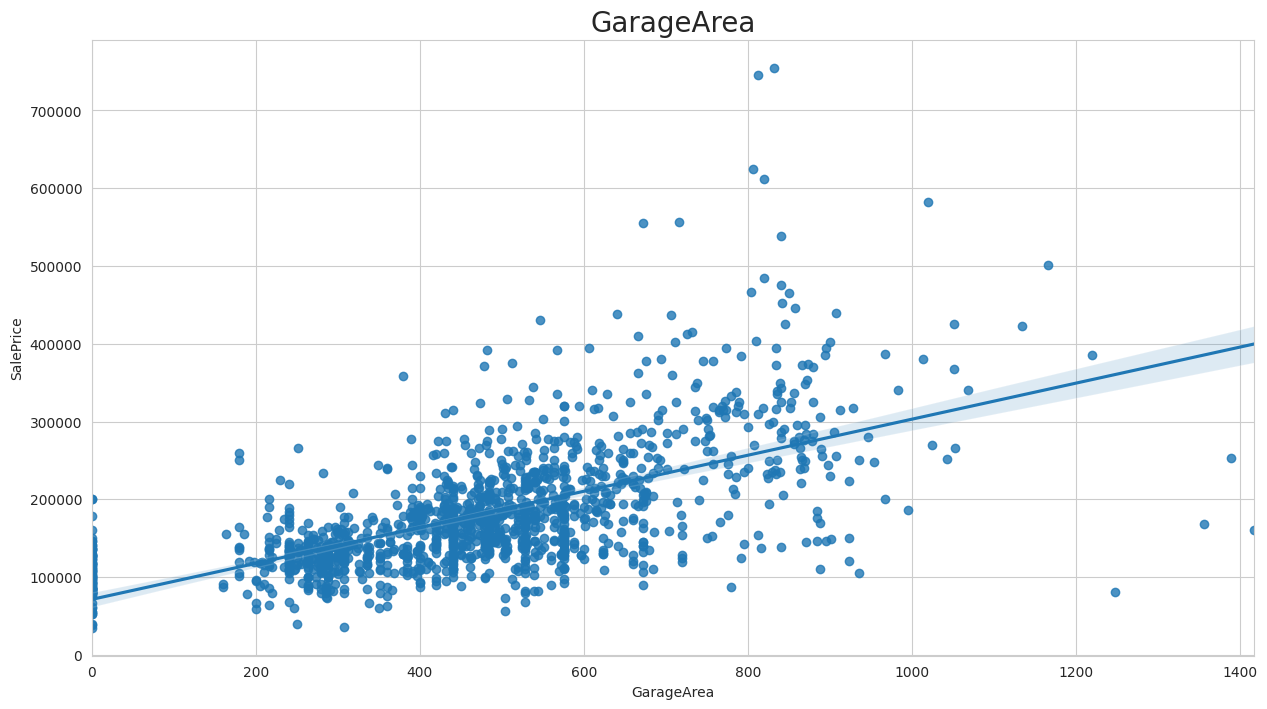

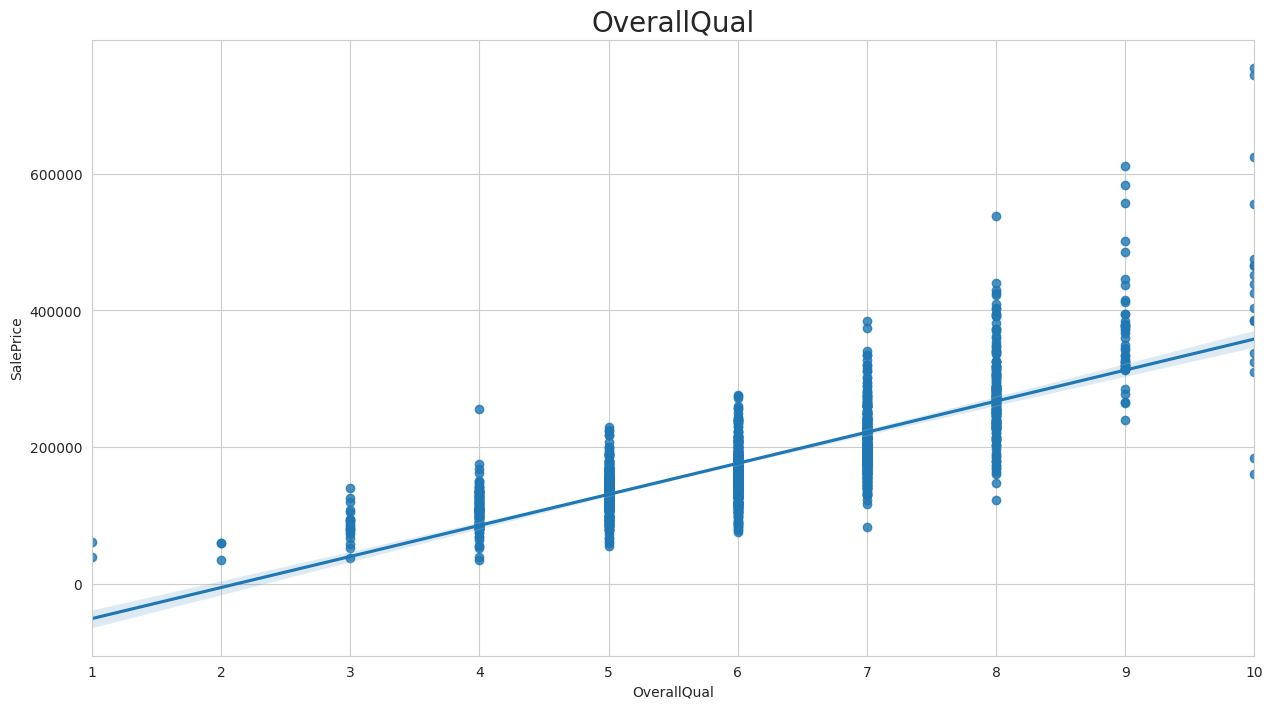

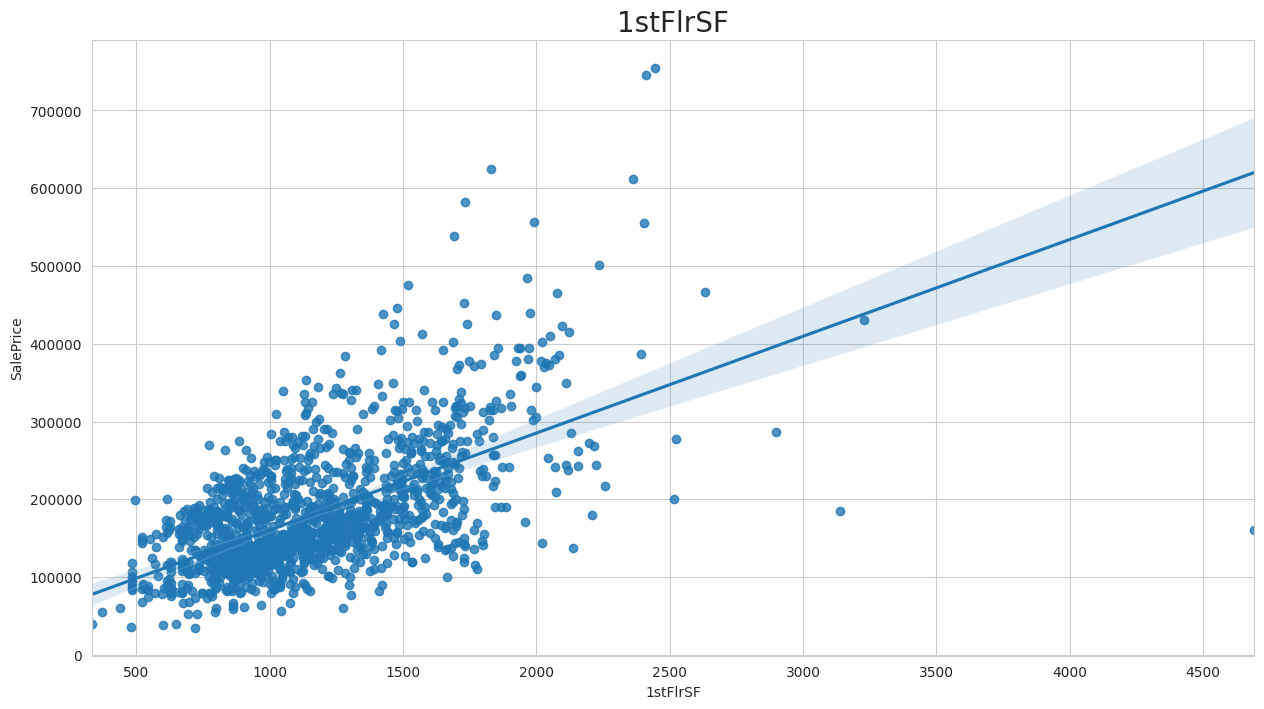

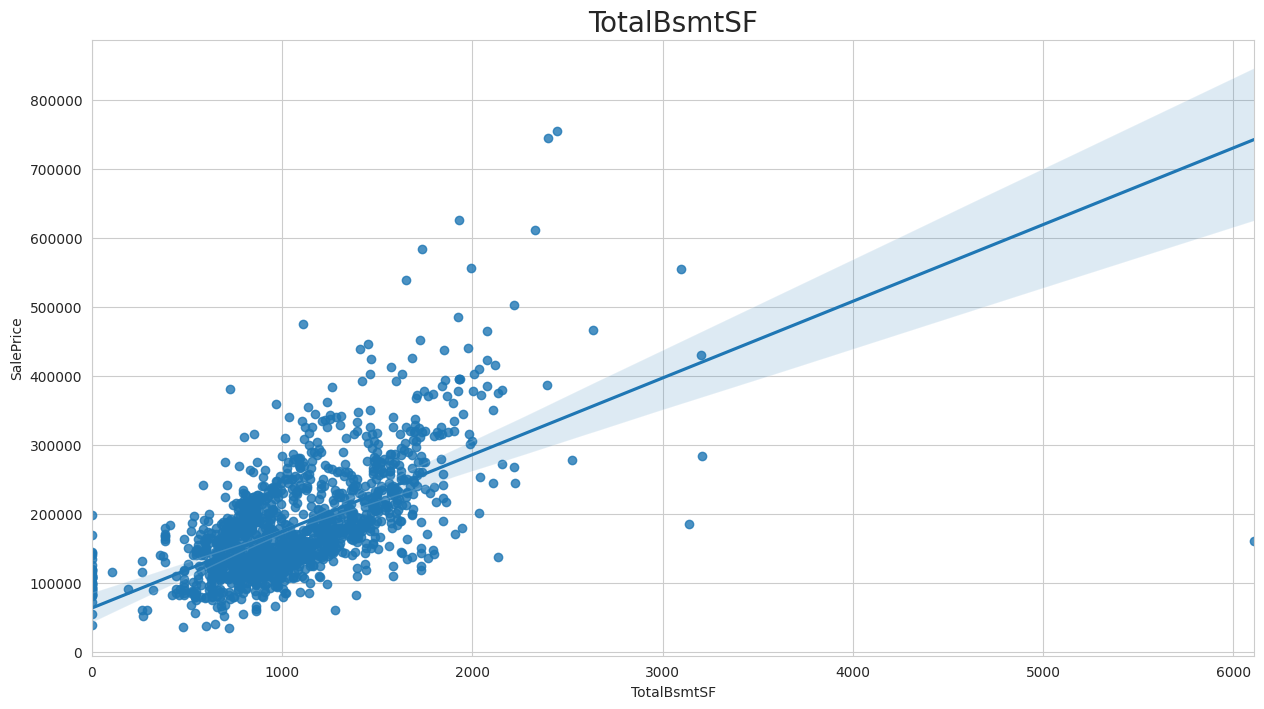

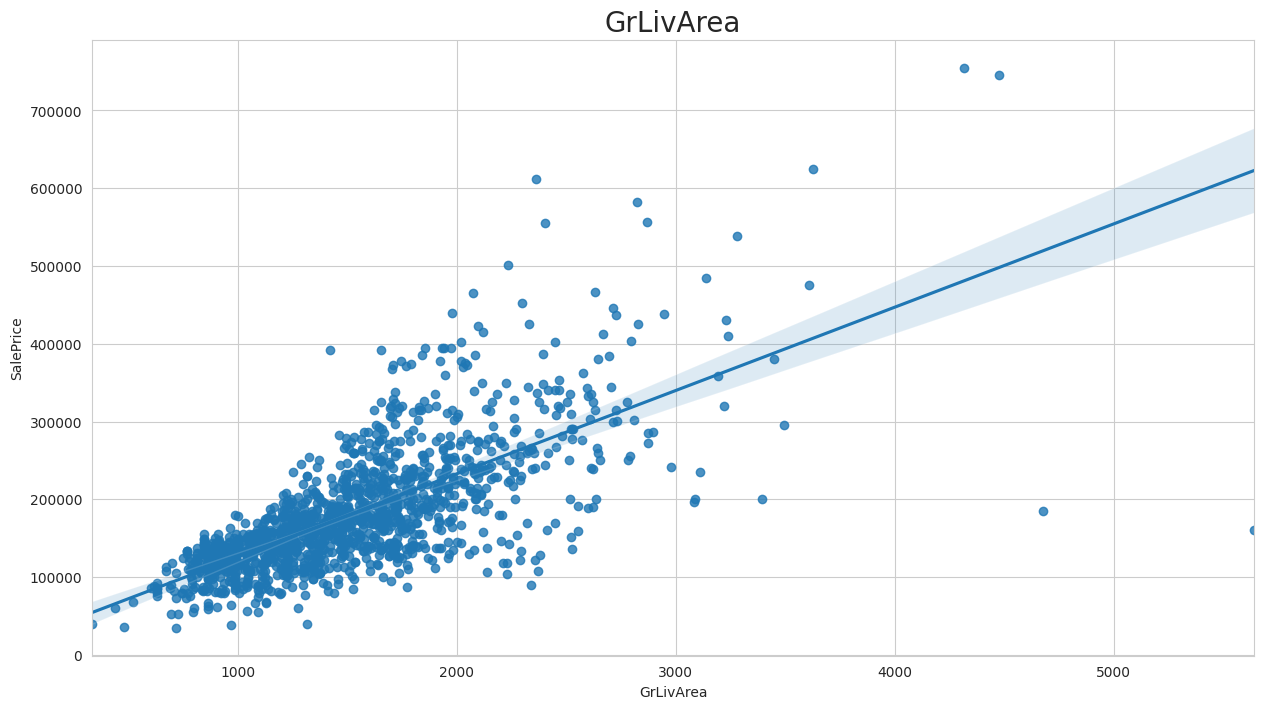

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

def plot_numerical(df, col, target_var):
  plt.figure(figsize=(15, 8))
  sns.regplot(data=df, x=col, y=target_var)  
  plt.title(f"{col}", fontsize=20)
  plt.show()


target_var = 'SalePrice'
for col in corr_var_list:
  plot_numerical(df_eda, col, target_var)
  print("\n\n")

---

# Conclusions and Next Steps

#### The correlations and plots interpretation converge.

* The following are the variables isolated in the correlation study:
  * 1stFlrSF: First Floor square feet
  * GarageArea: Size of garage in square feet
  * GrLivArea: Above grade (ground) living area square feet
  * OverallQual: Rates the overall material and finish of the house
  * YearBuilt: Original construction date
  * TotalBsmtSF: Total square feet of basement area

* The correlation analysis shows that the sizes of the ground floor living area, Basement area and the garage area, play a key role in determining house price. In addition, the year the house was built and the overall quality of materials used and the finishes in the house also play a significant role in determining house price.

* The plots show that the variables, isolated in the correlation study, do indeed have a strong correlation and hence possibly strong predictive power for Sale Price

* The next step is Data Cleaning

---